## 讀取檔案-有遺失值與儲存


In [12]:
import numpy as np
a = np.genfromtxt('data4.csv',dtype='uint16',delimiter=',',skip_header=1,encoding='utf-8')
print(a)
print(a.dtype)

[[ 106    1 8397  364  209  291  398  516  524  630  633  608  615  713
   648  584  509  308  304  298  171   58   15    1]
 [ 106    2 8393  359  210  293  394  513  524  624  636  599  630  709
   649  584  515  303  302  300  174   59   15    1]
 [ 106    3 8389  353  219  283  397  509  530  617  635  602  636  707
   643  585  517  304  307  297  174   59   14    1]
 [ 106    4 8376  349  211  277  395  511  532  614  641  603  635  699
   647  586  519  304  305  297  175   61   14    1]
 [ 106    5 8378  352  218  273  395  512  526  610  642  602  638  687
   652  594  518  305  307  298  172   61   15    1]
 [ 106    6 8395  352  225  271  393  516  529  612  642  603  629  693
   656  597  516  308  306  297  174   59   16    1]
 [ 106    7 8411  363  220  276  387  518  529  611  650  602  619  699
   652  606  521  305  308  294  174   60   16    1]
 [ 106    8 8409  362  222  277  380  515  533  605  649  608  615  705
   646  607  529  301  309  295  177   57   16    1]


# unpack=True 可把每欄資料切開為陣列
a= np.genfromtxt('data3.csv', dtype='uint16',delimiter=',', skip_header=1,encoding='utf-8-sig',unpack=True)
print(a)

## 範圍與百分位數
+ np.ptp( ) 計算最大與最小值的差（最大 -(減) 最小）。
+ np.percentile( ) 方法代表百分位數，用於統計數據的度量指標，需要三個參數：
  + array：陣列。
  + percent：計算的百分位數，介於 0 到 100 之間。
  + axis：進行計算的軸。
+ 百分位數是一種位置量數，有助於瞭解資料在最小值與最大值之間的分布情況。
+ p- 百分位數表示：
  + 至少有 p-百分比 (p%) 的觀察值小於或者等於他。
  + 至少有 (100-p)% 的觀察值大於或等於他。
+ 計算方式：
  + 將資料由小到大排序。
  + 計算 i=(p%*樣本數) 之位置。
  + 於 i 位置：
    + a. 若不是整數，無條件進位取比 i 大的下一個整數位置的值。
    + b. 若為整數，則由 i 與 i+1 兩個位置上的值取平均。


In [17]:
import numpy as np
a = np.array([[0, 30,45],[60,75,90]])
print(a)
print( )
print("---------------")
print(np.ptp(a))# 90-0
b=np.ptp(a, axis = 0)# [60-0,75-30,90-45]
print(b)
print("---------------")
b=np.ptp(a, axis = 1)#[45 -0,90-60]
print(b)
print("---------------")

[[ 0 30 45]
 [60 75 90]]

---------------
90
[60 45 45]
---------------
[45 30]
---------------


In [18]:
import numpy as np

arry = np.array([4,6,10,12,8])
#                           1 2 3  4 5 
# 注意percentile會在內部排序 4 6 8 10 12
# n是長度
# 位置=1+(n-1)*p n是元素 p是百分比 
#以下案例是:n=5 p=50
"""
1+(5-1)*0.5 = 3
正好落在 index為3的位置 答案是8
"""
b = np.percentile(arry, 50) 
print("The percentile is:",b)

a = np.array([[11, 8, 9], [5, 4, 1]])
#以下案例是:n=5 p=25
# 1 2 3 4 5 6
# 1 4 5 8 9 11
"""
先算出位置:
1+(6-1)X0.25 = 2.25
因為落在2.25所以index為2與3之間的數值
2.25的小數部分取出 0.25 所以下列公式乘上0.25
4 + (5-4) * 0.25  = 4.25
"""
b = np.percentile(a, 25)
print("The percentile is:",b) 

The percentile is: 8.0
The percentile is: 4.25


In [20]:
"""
[11,8,9]
[5,4,1]
先算出位置:
因為axis=0 所以是垂直計算
1+(2-1) * 0.5 = 1.5 
計算出的index是1.5
1.5正好落在1與2之間 取出index:1與index:2的數做計算
1.5的小數部分取出 0.5 所以乘上0.5
(11-5) * 0.5 + 5 = 8
"""
a = np.array([[11, 8, 9], [5, 4, 1]])
b = np.percentile(a, 50,axis=0)
print("The percentile is:",b)

"""
[11,8,9]
[5,4,1]

8 9 11
1 4  5 

先算出位置:
因為axis=1 所以是水平計算
1+(3-1) x 0.5 = 2 
正好 index:2 所以9

先算出位置:
因為axis=1 所以是水平計算
1+(3-1) x 0.5 = 2
正好 index:2 所以4
 

"""

b = np.percentile(a, 50,axis=1)
print("The percentile is:",b)


The percentile is: [8. 6. 5.]
The percentile is: [9. 4.]


## 變異數與標準差
+ 變異數代表所有資料到平均數的距離之平方。
+ 標準差代表變異數開平方根，也就是可依此表示資料的分散程度。
+ var( ) 代表由陣列取得變異數的方法。
+ std( ) 代表由陣列取得標準差的方法。

In [24]:
import math
import numpy as np
a = np.array([1,2,3,4])
print(a)
# 1+2+3+4 = 10
# 10/4=2.5 平均值為2.5
mean = a.mean()
print("========MEAN========")
print(mean)
var = ((a - mean)**2).mean()
#(1-2.5)^2 + (2-2.5)^2 + (3-2.5)^2 + (4-2.5)^2 /4
var = ((1-2.5)**2 + (2-2.5) **2 + (3-2.5)**2 + (4-2.5)**2) /4
print("========VAR========")
print(var)#變異數
b = np.var(a)#變異數
print(b)
print("========STD========")
print(math.sqrt(var))#標準差
b=np.std(a)#標準差
print(b)

[1 2 3 4]
========MEAN========
2.5
========VAR========
1.25
1.25
========STD========
1.118033988749895
1.118033988749895


## 累加與累差
+ np.cumsum( ) 方法進行指定軸資料的累加。
+ 參數：
  + array：陣列
  + axis：軸，沒有指定軸則會平坦化後進行累加
+ 維持原有的資料數量，且在計算結果上進行下一個計算。
+ np.diff( ) 方法進行指定軸資料的累差。
+ 參數：
  + array：陣列
  + axis：軸，沒有指定軸預設 axis 為 1
+ 以原資料進行資料內容刪除，若 axis 為 0 則減少一個 row，若 axis 為 1 減少一個 column。


In [25]:
import numpy as np
a = np.array([[1, 2, 3], [13, 6, 9], [12, 24, 36]])
print(a)
print(np.cumsum(a))
print("---------------")
print(np.cumsum(a,axis=0))
print("---------------")
print(np.cumsum(a,axis=1))
print("---------------")

[[ 1  2  3]
 [13  6  9]
 [12 24 36]]
[  1   3   6  19  25  34  46  70 106]
---------------
[[ 1  2  3]
 [14  8 12]
 [26 32 48]]
---------------
[[ 1  3  6]
 [13 19 28]
 [12 36 72]]
---------------


In [26]:
import numpy as np
a = np.array([[1, 2, 3], 
              [13, 6, 9]])
print(a)
print(np.diff(a))#預設axis=1
print("---------------")
print(np.diff(a,axis=0))#[13-1,6-2,9-3]
print("---------------")
print(np.diff(a,axis=1))#[2-1,3-2]
                        #[6-13,9-6]
print("---------------")


[[ 1  2  3]
 [13  6  9]]
[[ 1  1]
 [-7  3]]
---------------
[[12  4  6]]
---------------
[[ 1  1]
 [-7  3]]
---------------


##  作業

In [27]:
import numpy as np
a = np.genfromtxt('HW13__Data.csv',dtype='int',delimiter=',', skip_header=1,encoding='utf-8-sig')
a = a[a[:,0]<108]
#print(a)
for data in a:
      print(f'{data[0]} {data[1]}國小(含)之前的人數{data[3:5].sum()}')

106 1國小(含)之前的人數573
106 2國小(含)之前的人數569
106 3國小(含)之前的人數572
106 4國小(含)之前的人數560
106 5國小(含)之前的人數570
106 6國小(含)之前的人數577
106 7國小(含)之前的人數583
106 8國小(含)之前的人數584
106 9國小(含)之前的人數582
106 10國小(含)之前的人數584
106 11國小(含)之前的人數583
106 12國小(含)之前的人數583
107 1國小(含)之前的人數590
107 2國小(含)之前的人數593
107 3國小(含)之前的人數584
107 4國小(含)之前的人數571
107 5國小(含)之前的人數565
107 6國小(含)之前的人數567
107 7國小(含)之前的人數568
107 8國小(含)之前的人數562
107 9國小(含)之前的人數559
107 10國小(含)之前的人數558
107 11國小(含)之前的人數551
107 12國小(含)之前的人數546


# Numpy查找資料與Copy

## 查找資料條件與回傳
+ np.where( ) 方法將會返回輸入陣列中滿足設定的條件之元素索引：
  + np.where(陣列查找資料條件)
  + 傳回值是符合條件的欄位索引值
+ np.extract( ) 方法將會返回滿足任何條件的元素：
  + np.extract(陣列查找資料條件,陣列)
  + 傳回值是符合條件的欄位內容

In [31]:
import numpy as np
a = np.array([0,30,45,60,75,90])
print(a > 15)
b = np.where(a > 15)
print(b)
condition = (np.mod(a,2) == 0)
print(condition)
print( )
b = np.where(condition) # 回傳符合條件的index
print(b)
print (a[b])
print(np.extract(condition, a))

[False  True  True  True  True  True]
(array([1, 2, 3, 4, 5], dtype=int64),)
[ True  True False  True False  True]

(array([0, 1, 3, 5], dtype=int64),)
[ 0 30 60 90]
[ 0 30 60 90]


## 陣列複製
+ 陣列指派拷貝：若以指派的方式將陣列交給另外一個，這兩個陣列的記憶體位址會是相同，兩個的資料變化與形狀變化會是相同。
+ 陣列淺層拷貝：若以 view( ) 方式將陣列交給另外一個，將形狀複製到另外一個陣列，這兩個陣列的記憶體位址不同，兩個陣列形狀變化不會相同，但兩個的資料變化相同。
+ 陣列深層拷貝：若以 copy( ) 方式將陣列交給另外一個，則會將形狀與資料複製到另外一個陣列，這兩個陣列的記憶體位址不同，兩個陣列形狀變化不會相同，兩個的資料變化也不同。

In [33]:
import numpy as np
a = np.arange(6)
print(a)
print("========================")
print(id(a))
b = a
print("========================")
print(b)
print("========================")
print(id(b))
print("========================")
b.shape = (3,2)
print(b)
print("========================")
print(a)
b[0,0] = 100
print("========================")
print(a)

[0 1 2 3 4 5]
2474552378736
[0 1 2 3 4 5]
2474552378736
[[0 1]
 [2 3]
 [4 5]]
[[0 1]
 [2 3]
 [4 5]]
[[100   1]
 [  2   3]
 [  4   5]]


## View

In [34]:
import numpy as np
a = np.arange(6)
print(a)
print(id(a))
print("========================")
b = a.view( )
print(b)
print(id(b))
print("========================")
b.shape = 3,2
print(b) # b shape變
print(a) # a shape不變
print("========================")
b[0,0] = 100 # b改了 a會變
print(a) # 

[0 1 2 3 4 5]
2474580827376
[0 1 2 3 4 5]
2474583345936
[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]
[100   1   2   3   4   5]


## 陣列複製

In [35]:
import numpy as np
a = np.arange(6)
print(a)
print(id(a))
print("========================")
b = a.copy( )
print(b)
print(id(b))
print("========================")
b.shape = 3,2
print(b)
print(a)
print("========================")
b[0,0] = 100
print(a) 
print(b)

[0 1 2 3 4 5]
2474583345168
[0 1 2 3 4 5]
2474538735728
[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[[100   1]
 [  2   3]
 [  4   5]]


## 繪製圖表
+ 請先引用 matplotlib 套件：
  + import matplotlib.pyplot as plt
+ 只有繪製折線圖可使用 plt.plot( ) 方法繪製。
+ 若 plot( ) 方法內只有一個參數，預設為 y 軸資料，x 軸為預設整數值。
+ 若 plot( ) 方法內有兩個參數，代表 x 軸與 y 軸座標，若為四個參數，代表兩條曲線。
+ 最後顯示出圖片請加上 .show( ) 方法。

### 圖表基本區塊
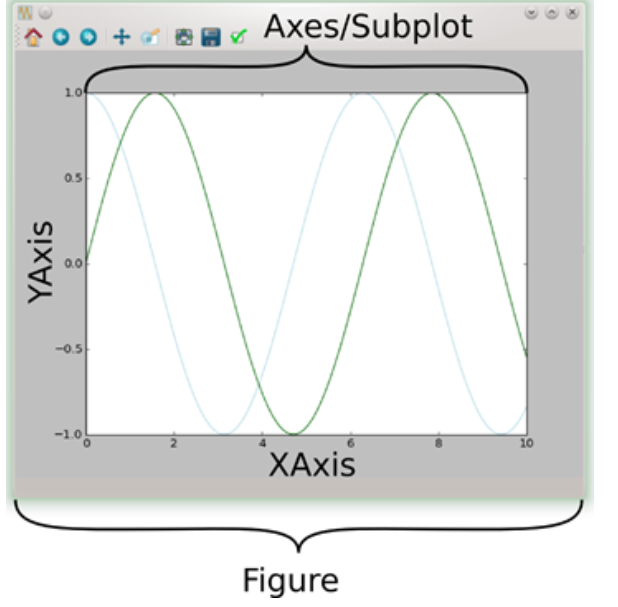

### figure 可加入參數
+ plt.figure( ) 方法會建立一個圖像，該代碼後的所有圖像會繪製到這個圖像中，一個項目中可以添加多個  figure，常用參數如下：
 + num：設置圖像的序號，不設置該參數，自動默認編號。
 + figsize：設置圖像大小。
 + facecolor：圖像前景色。

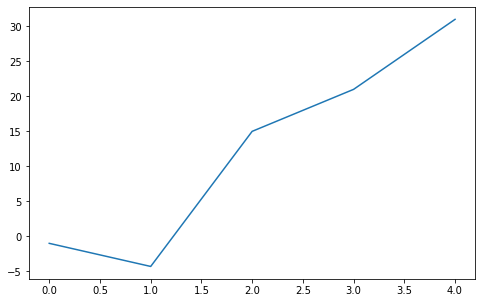

In [36]:
import matplotlib.pyplot as plt
data = [-1, -4.3, 15, 21, 31]
plt.figure(num=3, figsize=(8, 5))
plt.plot(data) 
plt.show( )

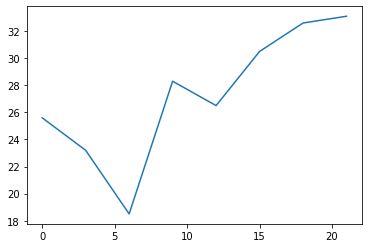

In [44]:
import  matplotlib.pyplot  as  plt
x1 = range(0, 22, 3)
y1 = [25.6, 23.2, 18.5, 28.3, 26.5, 30.5, 32.6, 33.1]
plt.plot(x1, y1)
plt.show( )

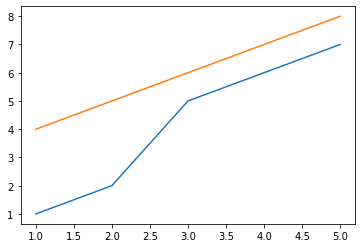

In [45]:
import  matplotlib.pyplot  as  plt
x = [1,2,3,4,5]
y1=[1,2,5,6,7]
y2=[4,5,6,7,8]
plt.plot(x, y1, x, y2)
plt.show( )

## 更改線條外觀
+ plot(）方法內可以加入參數更改線條外觀。
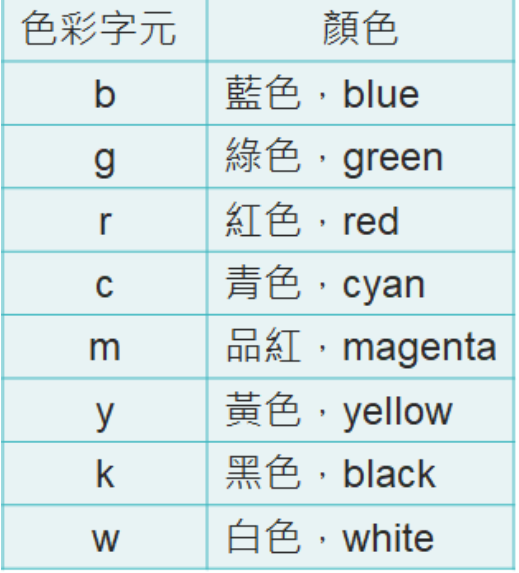
+ plot(）方法內可以加入參數更改線條外觀。
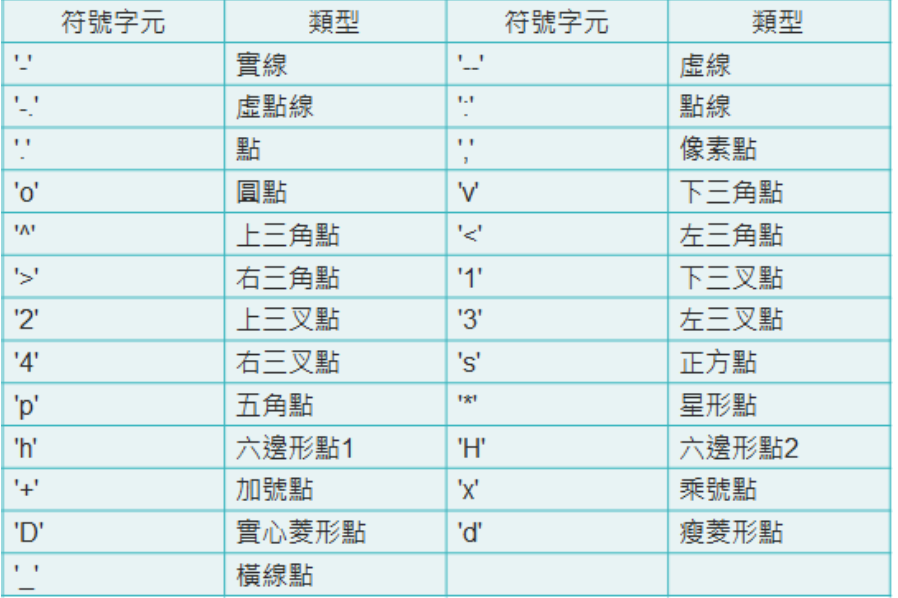

### 圖表格線與座標範圍
+ .grid( ) 方法可以產生格線。
+ 顯示範圍：可以使用 axis 函數指定坐標軸顯示的範圍。
  + plt.axis([xmin, xmax, ymin, ymax])

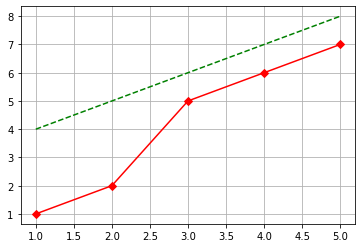

In [49]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y1=[1,2,5,6,7]
y2=[4,5,6,7,8]
plt.plot(x, y1, "r-o",
         x, y2, "g--")
plt.grid() #顯示格線
plt.show( )

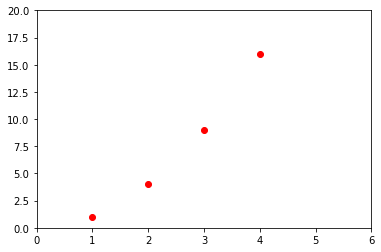

In [52]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0,6,0,20])#x(0~6) y(0~20)
plt.show()

### 圖表標題與座標軸標籤
+ 使用 plt.title( ) 方法顯示圖表標題。
+ 使用 plt.xlim 設置 x 座標軸範圍。
+ 使用 plt.ylim 設置 y 座標軸範圍。
+ 使用 plt.xlabel 設置 x 座標軸名稱。
+ 使用 plt.ylabel 設置 y 座標軸名稱。
+ 使用 plt.xticks 重新設定 x 座標的刻度。
+ 使用 plt.yticks 重新設定 y 座標的刻度。

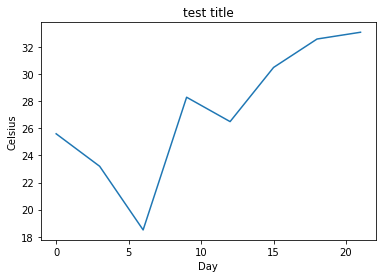

In [53]:
import matplotlib.pyplot as plt
days = range(0, 22, 3)
celsius = [25.6, 23.2, 18.5, 28.3, 26.5, 30.5, 32.6, 33.1]
plt.plot(days, celsius)
plt.xlabel("Day")
plt.ylabel("Celsius")
plt.title("test title")
plt.show()

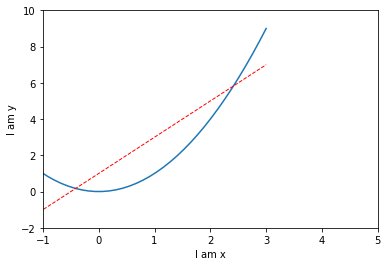

In [57]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3, 3, 50)
#print(x)
y1 = 2*x + 1
y2 = x**2
plt.plot(x, y2)
plt.plot(x, y1, color='red', linewidth=1.0, linestyle='--')
plt.xlim((-1, 5))#修改x軸的範圍-1~5
plt.ylim((-2, 10))#修改y軸的範圍-2~10
plt.xlabel('I am x')
plt.ylabel('I am y')
plt.show( )

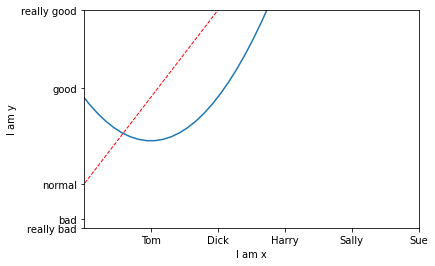

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3, 3, 50)
y1 = 2*x + 1
y2 = x**2
plt.plot(x, y2)
plt.plot(x, y1, color='red', linewidth=1.0, linestyle='--')

plt.xlim((-1, 2))
plt.ylim((-2, 3))
plt.xlabel('I am x')
plt.ylabel('I am y')
plt.xticks(np.arange(5),('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
plt.yticks([-2, -1.8, -1, 1.22, 3],['really bad', 'bad', 'normal', 'good', 'really good'])
plt.show( )

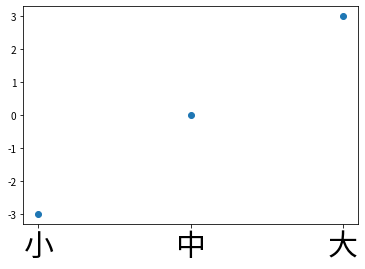

In [2]:
import matplotlib.pyplot as plt
# 將字體換成Noto Serif
plt.rcParams['font.sans-serif'] = ['Noto Sans TC']
# 修復負號顯示問題
plt.rcParams['axes.unicode_minus']=False
x_labels = ['小', '中', '大']
x = range(len(x_labels))
y = [-3, 0, 3]
plt.scatter(x, y)
plt.xticks(x,x_labels)
plt.tick_params(axis='x', which='major', labelsize=30)
plt.show()